___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [7]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

<Axes: >

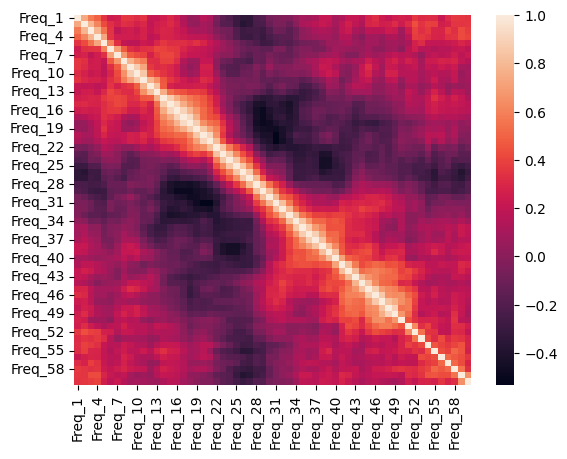

In [4]:
# CODE HERE
data_column = df.drop('Label', axis=1)
sns.heatmap(data_column.corr())

<AxesSubplot:>

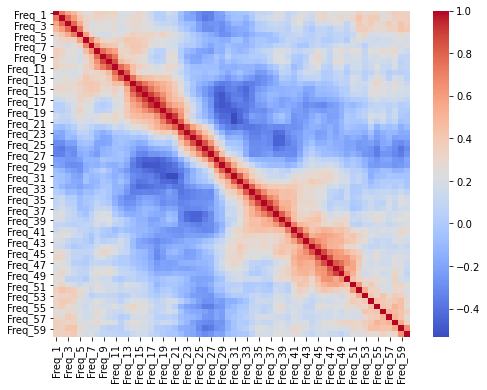

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [5]:
#CODE HERE
from sklearn.preprocessing import OneHotEncoder

In [10]:
encoder = OneHotEncoder(drop='first')
# encoder.fit_transform(df[['Label']])
df['Label'] = pd.DataFrame(encoder.fit_transform(df[['Label']]).toarray())

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
203    0.0
204    0.0
205    0.0
206    0.0
207    0.0
Name: Label, Length: 208, dtype: float64

In [12]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [15]:
np.abs(df.corr()['Label']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Label', axis=1)
y = df['Label']

In [18]:
x_cv, X_test, y_cv, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [31]:
y_cv

170    0.0
104    0.0
101    0.0
69     1.0
25     1.0
      ... 
106    0.0
14     1.0
92     1.0
179    0.0
102    0.0
Name: Label, Length: 187, dtype: float64

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [21]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
oprations = [('scaler', scaler), ('knn', knn)]

In [23]:
pipe = Pipeline(oprations)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [24]:
k_values = list(range(1,30))
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [32]:
param_grid = {'knn__n_neighbors': k_values}

In [33]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [34]:
full_cv_classifier.fit(x_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [35]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [36]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

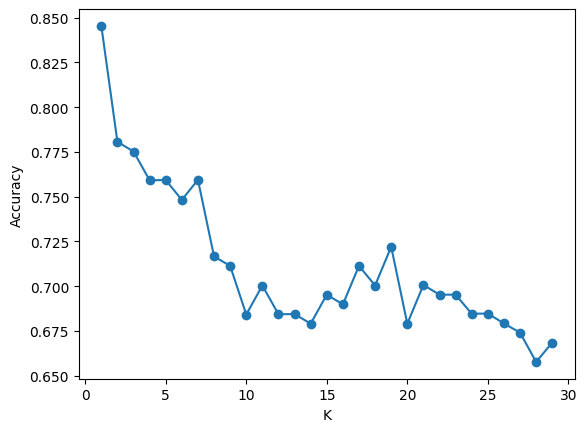

In [37]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [38]:
pred = full_cv_classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [40]:
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Great Job!